# Visualisation (Python &ndash; seaborn)

## 1. Examples for the lecture

Here are examples of computations and graphs used for the lecture ***Tools for EDA & visualisation***. Study and run them, they may be useful for your work in the next section.

Complete tutorials to pandas and seaborn can be found at links:

* [Pandas](https://pandas.pydata.org)
* [Seaborn](https://seaborn.pydata.org)

First we read packages, setup the environment, read and adjust data.

In [2]:
### Setup
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns

# classes for special types
from pandas.api.types import CategoricalDtype

# Apply the default theme, set bigger font
sns.set_theme()

# Reading and adjusting data
K = pd.read_csv("application_train.csv")
K = K[0:500] # only first 500 records as a sample
K.columns = K.columns.str.lower() # column names to lowercase
# new columns with more intuitive values
K["age"] = -K["days_birth"] / 365.25 
K["yrs_employed"] = -K["days_employed"] / 365.25
K["yrs_employed"] = np.where(K["yrs_employed"] < 0, np.nan, K["yrs_employed"]) # cleaning from nonsense values
K

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,...,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,age,yrs_employed
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25.902806,1.744011
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45.900068,3.252567
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52.145106,0.616016
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,52.032854,8.320329
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,54.570842,8.317591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,100572,0,Cash loans,F,N,Y,0,31500.0,314055.0,13437.0,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,52.320329,NaN
496,100573,0,Cash loans,F,Y,N,1,157500.0,961146.0,26559.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,36.911704,4.610541
497,100574,0,Cash loans,M,Y,Y,0,225000.0,1125000.0,60070.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,50.047912,0.659822
498,100575,0,Cash loans,M,Y,Y,0,108000.0,247275.0,17586.0,...,0,0,0.0,0.0,0.0,0.0,1.0,1.0,61.445585,NaN


### 1.1 Distributions of individual variables

Basic seaborn method for plotting graph of individual distribution is [displot](https://seaborn.pydata.org/tutorial/distributions.html). It can make plots both for categorial and numeric variables.

Let's start with some **categorial variables**. We make a frequency table (we combine absolute and relative frequencies). For ordinal (ordered) variable, it may be meaningful to compute cumulative frequencies.

In [3]:
# Categorial variable - frequency table
freqtab = K.groupby("name_type_suite").agg(count=("sk_id_curr", "count")) # absolute frequencies (counts)
freqtab["count_rel"] = freqtab["count"] / sum(freqtab["count"]) # relative frequencies
freqtab

,count,count_rel
name_type_suite,,
Children,7,0.014028
Family,60,0.120240
Group of people,1,0.002004
Other_A,3,0.006012
Other_B,2,0.004008
"Spouse, partner",20,0.040080
Unaccompanied,406,0.813627


In [4]:
# for cumulative frequencies, the variable needs to be ordered
cat_type = CategoricalDtype(categories=["Lower secondary", "Secondary / secondary special",
                                        "Incomplete higher", "Higher education"],
                            ordered=True)
K["education"] = K["name_education_type"].astype(cat_type)
# frequency table
freqtab = K.groupby("education").agg(count=("sk_id_curr", "count")) # absolute frequencies (counts)
freqtab["count_cum"] = freqtab["count"].cumsum() # cumulative frequencies
freqtab["count_rel"] = freqtab["count"] / sum(freqtab["count"]) # relative frequencies
freqtab["count_relcum"] = freqtab["count_rel"].cumsum() # cumulative relative frequencies
freqtab

,count,count_cum,count_rel,count_relcum
education,,,,
Lower secondary,1,1,0.002,0.002
Secondary / secondary special,358,359,0.716,0.718
Incomplete higher,14,373,0.028,0.746
Higher education,127,500,0.254,1.000


The visualisation of frequencies is simple &ndash; we use barplot, either standard (bars beside) or stacked (useful for cumulative frequencies). Variable name is assigned either to *x* or to *y* parameter, bars are then either vertical or horizontal.

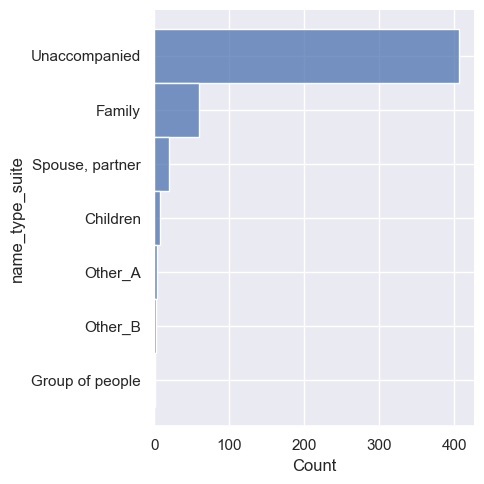

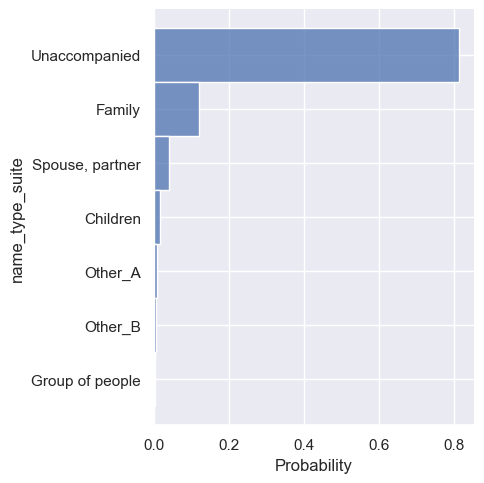

In [5]:
# graphs for absolute and relative frequencies
# done directly from DataFrame, no need to compute frequency table
g = sns.displot(data=K, y="name_type_suite") # absolute freqs
g = sns.displot(data=K, y="name_type_suite", stat='probability') # relative freqs - difference only at Y scale

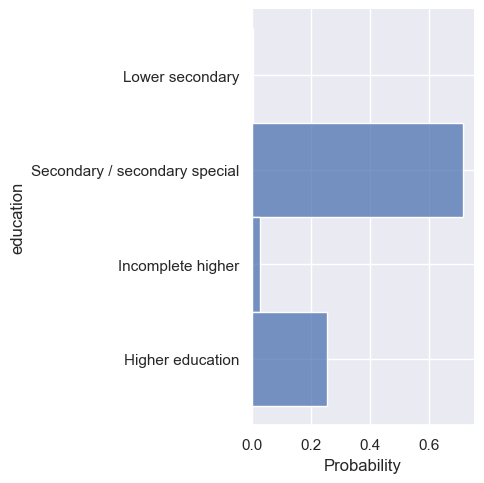

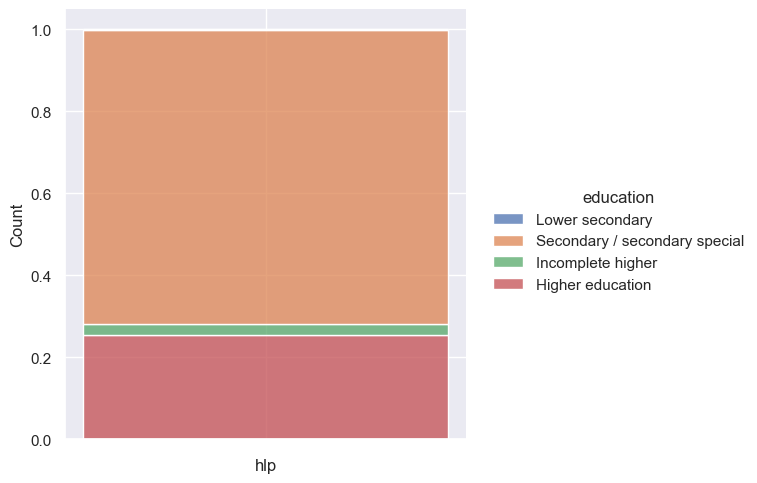

In [6]:
# frequencies for ordinal variable
g = sns.displot(data=K, y="education", stat="probability") # relative frequencies directly from DataFrame

# for stacked barplot, we use frequency table computed above
freqtab["hlp"] = [""] * len(freqtab) # dummy variable, just for filling the seaborn parameter
# "education" is an alternative name for the index here
g = sns.displot(data=freqtab, x="hlp", hue="education", multiple="stack", weights="count_rel")

# for stacked absolute frequencies, use "count" instead of "count_rel"

If we want to annotate the graph, we may use *set* methods. For more fine-tuning (colors etc.) see seaborn tutorial.

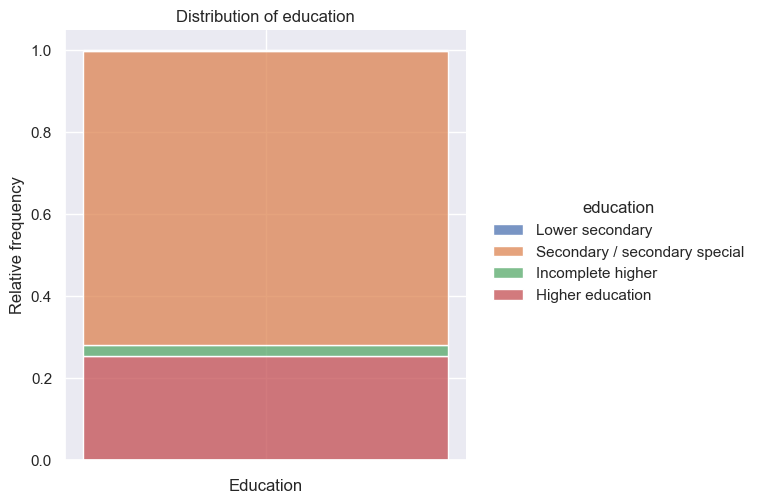

In [7]:
g = sns.displot(data=freqtab, x="hlp", hue="education", multiple="stack", weights="count_rel") \
    .set_axis_labels("Education", "Relative frequency") \
    .set(title="Distribution of education")

Now we treat some **numeric variables**. We make bunch of graphs with different level of detail and smoothing. Many of them use *displot* method and the parameter *kind* changes type of graph (ecdf, density etc.) from the default type, which is histogram. Some graphs use *catplot* method because stripplot and swarmplot are under that method, not under catplot.

If the variable is numeric but with few unique values, we can treat it as categorial &ndash; note using *discrete* parameter to adjust bar positions in histogram.

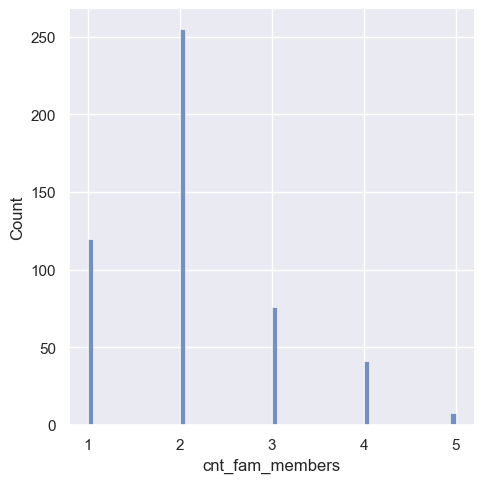

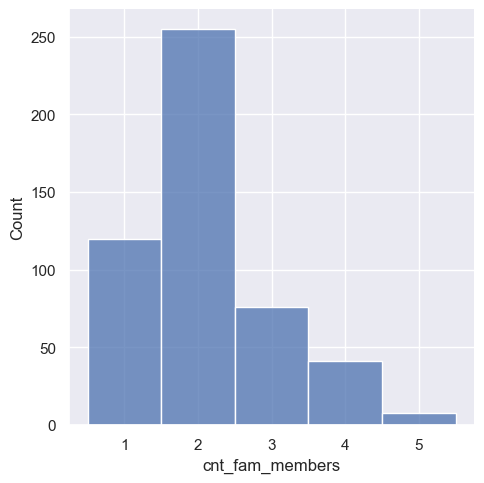

In [8]:
### Numerical discrete variable
# treated as categorial
g = sns.displot(data=K, x="cnt_fam_members") # not so pretty
g = sns.displot(data=K, x="cnt_fam_members", discrete=True) # better adjusted bars

Continuous numeric variable can be plotted many ways depending on required completeness of information.

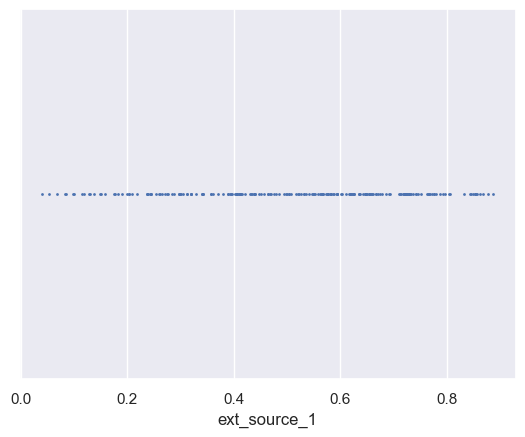

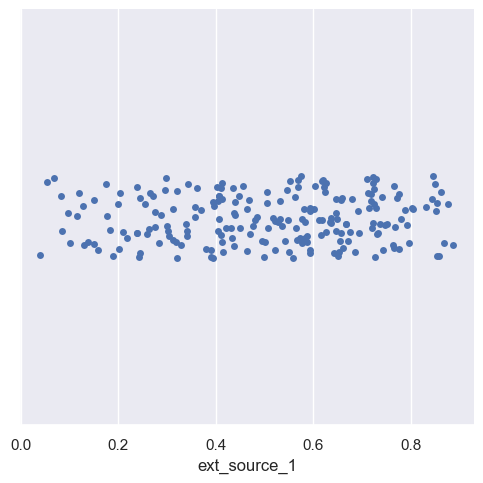

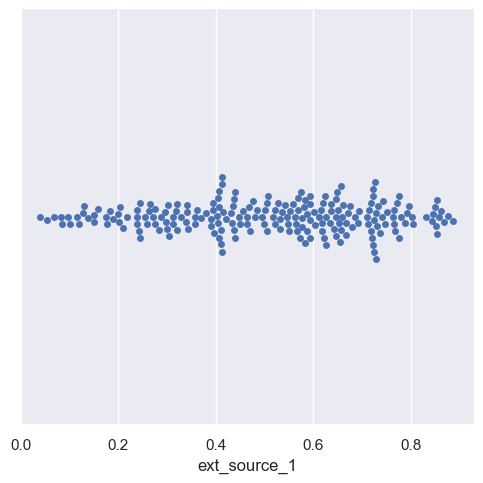

In [9]:
# rug can be displayed via catplot and stripplot or swarmplot
g = sns.stripplot(data=K, x="ext_source_1", jitter=False, size=2)
# for no overlapping, use
g = sns.catplot(data=K, x="ext_source_1")
g = sns.catplot(data=K, x="ext_source_1", kind="swarm")

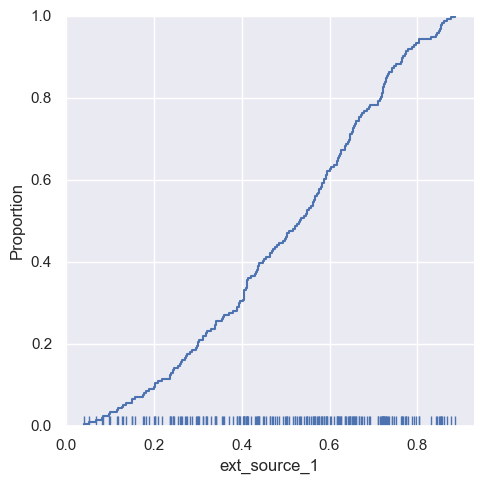

In [10]:
# ecdf with rug
g = sns.displot(data=K, x="ext_source_1", kind="ecdf", rug=True)

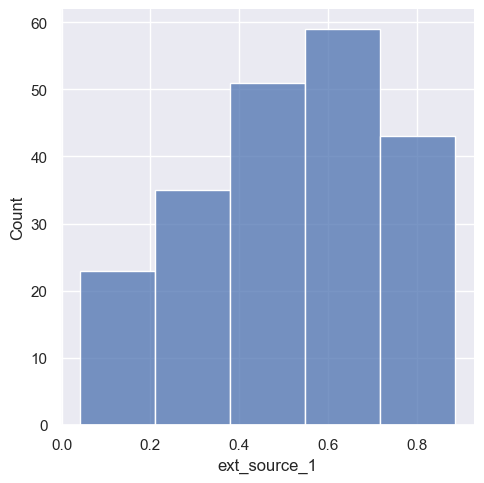

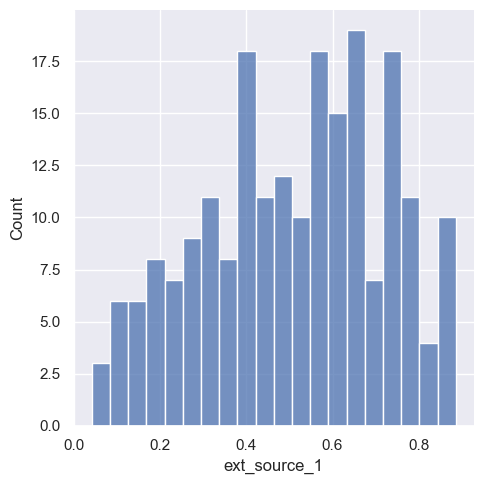

In [11]:
# histogram
g = sns.displot(data=K, x="ext_source_1", bins=5)
# for less smoothing, use bigger number of bins:
g = sns.displot(data=K, x="ext_source_1", bins=20)

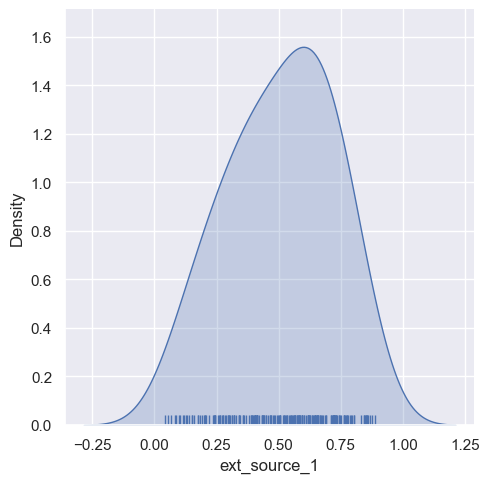

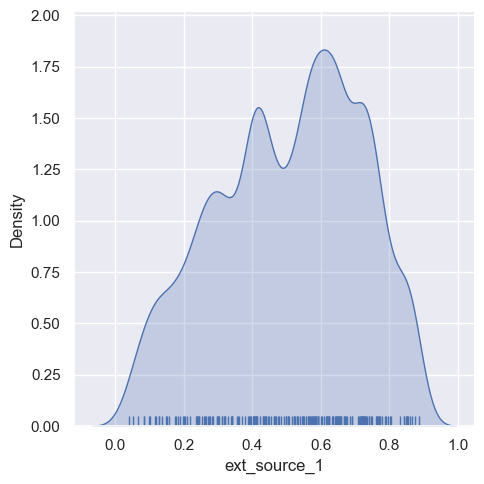

In [12]:
# density with rug
g = sns.displot(data=K, x="ext_source_1", kind="kde", rug=True, fill=True, bw_adjust=1.5)
# for less smoothing, use bigger number of bins:
g = sns.displot(data=K, x="ext_source_1", kind="kde", rug=True, fill=True, bw_adjust=0.5)

For numeric variable, information of distribution can be usually "compressed" into few numbers (statistics).

In [13]:
# computing statistical characteristics of distribution
print("Min and max age: ", "%.1f" % K["age"].min(), "--", "%.1f" % K["age"].max())
print("Mean age: ", "%.1f" % K["age"].mean())
print("Median age: ", "%.1f" % K["age"].median())
print("Std. dev. of age: ", "%.1f" % K["age"].std())

print("Decils of age:\n")
hlp_10s = [i/10.0 for i in range(0, 11)]
print(K["age"].quantile(hlp_10s))

Min and max age:  21.2 -- 68.7
Mean age:  43.6
Median age:  43.3
Std. dev. of age:  11.8
Decils of age:

0.0    21.210130
0.1    27.922793
0.2    31.980835
0.3    36.217385
0.4    39.310609
0.5    43.278576
0.6    46.818891
0.7    50.967283
0.8    55.100342
0.9    60.133060
1.0    68.731006
Name: age, dtype: float64


For a skewed distribution, quantiles are more useful than mean or standard deviation. They can be plotted as ECDF (quantiles can be calculated from Y axis) or boxplot.

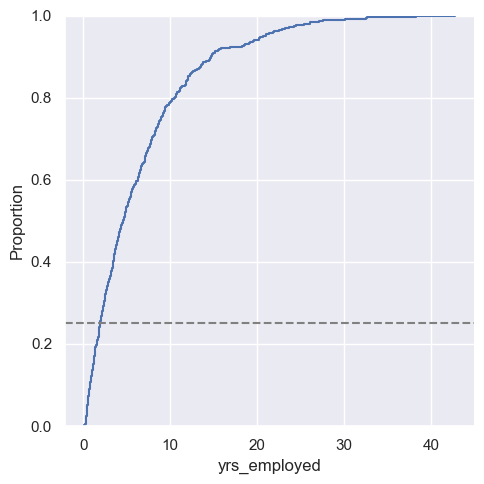

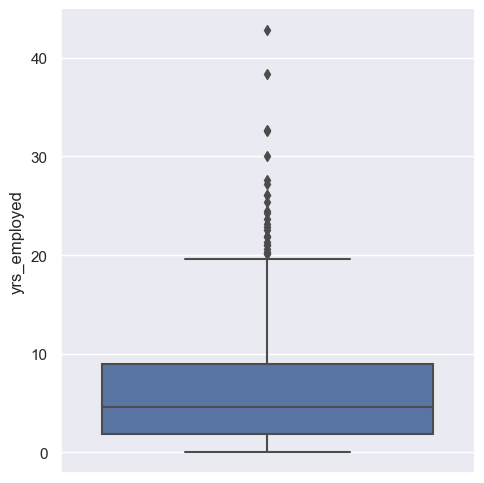

In [14]:
# quantiles for skewed distribution - ecdf, boxplot
g = sns.displot(data=K, x="yrs_employed", kind="ecdf") \
    .refline(y=0.25)
g = sns.catplot(data=K, y="yrs_employed", kind="box")

### 1.2 Relationships of variables

Method for analysis and plotting are different depending on type (categorial or numeric) of both variables. 

* If one of variables is categorial, the basic strategy is to split the data into categories by this variable and to study distribution of the other variable for each category (and to compare distributions among various categories).
* If both variables are numeric, then we use bivariate plots and compute statistics like correlation.

Let's start with the case of both variables categorial. In this case we usually compute a contingency table (2-D frequency table).

In [15]:
# contingency table with absolute frequencies
pd.crosstab(K["name_family_status"], K["code_gender"])

code_gender,F,M
name_family_status,,
Civil marriage,36,18
Married,176,128
Separated,26,6
Single / not married,44,34
Widow,28,4


In [16]:
# for relative frequencies in contingency table, use parameter normalize:
pd.crosstab(K["name_family_status"], K["code_gender"], normalize="columns") # relative by columns

code_gender,F,M
name_family_status,,
Civil marriage,0.116129,0.094737
Married,0.567742,0.673684
Separated,0.083871,0.031579
Single / not married,0.141935,0.178947
Widow,0.090323,0.021053


Visualisation of contingency table, similarly to frequency table, can be done by some kind of barplot. Bars can be:

* put beside one by one
* stacked within each category as absolute counts
* stacked within each category as relative counts (all stacked bars sum up to 1)

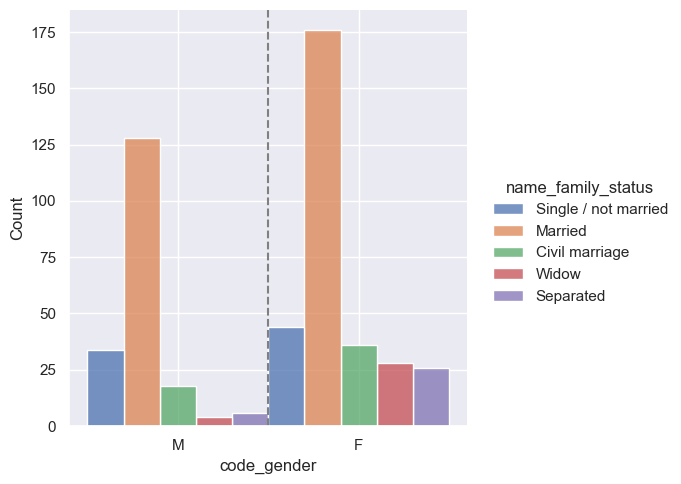

In [17]:
# barplot with bars beside
g = sns.displot(data=K, x="code_gender", hue="name_family_status", multiple="dodge")\
    .refline(x=0.5) # auxiliary line to split categories

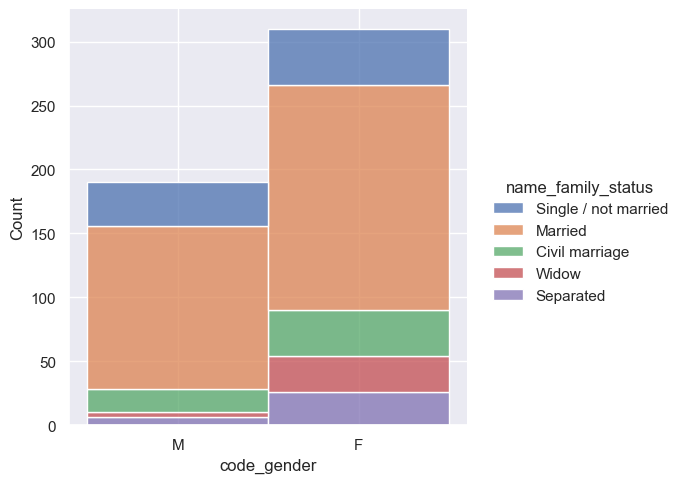

In [18]:
# barplot with stacked bars as absolute counts
g = sns.displot(data=K, x="code_gender", hue="name_family_status", multiple="stack")

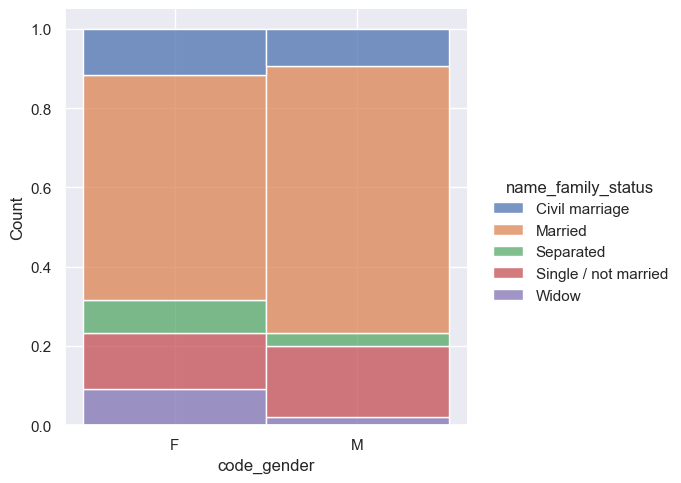

In [19]:
# barplot stacked as relative counts (sums up to 1)
# needs data preparation
hlp_df = pd.crosstab(K["name_family_status"], K["code_gender"], normalize="columns")
hlp_df1 = hlp_df[["F"]]
hlp_df1.columns = ["prop"]
hlp_df1["code_gender"] = "F"
hlp_df1.reset_index(level=0, inplace=True)
hlp_df2 = hlp_df[["M"]]
hlp_df2.columns = ["prop"]
hlp_df2["code_gender"] = "M"
hlp_df2.reset_index(level=0, inplace=True)
hlp_df = pd.concat([hlp_df1, hlp_df2])
hlp_df.index = range(len(hlp_df))

g = sns.displot(data=hlp_df, x="code_gender", hue="name_family_status", multiple="stack", weights="prop")

Another idea is to make *heatmap* &ndash; replace each cell in a contingency table by color tone according to the value in the cell. This is good for plotting absolute frequencies but may be confusing for relative ones.

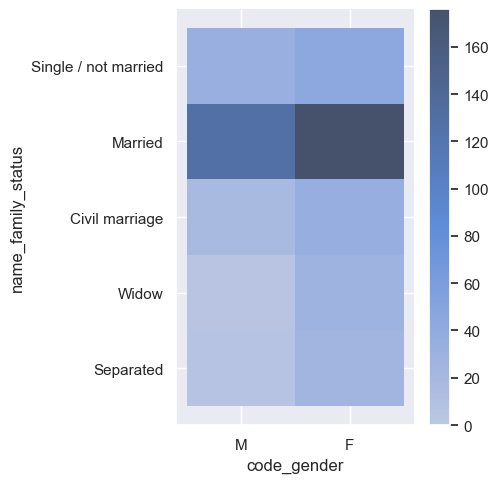

In [20]:
# discrete heatmap
g = sns.displot(data=K, x="code_gender", y="name_family_status", cbar=True)

Having one categorial and one numeric variable, we can split the data by categorial variable and compute statistics by categories. There are many ways how to do splitting by categories when plotting:

* multiple lines (curves), possibly overlapping
* use one axis for categories (sections inside one graph), distribution graph in each section separately
* split figure to separate graphs

We can either use *displot* with parameters *hue* or *col* or *catplot* with category variable as *x* (or *y*, if we want split the graph horizontally).

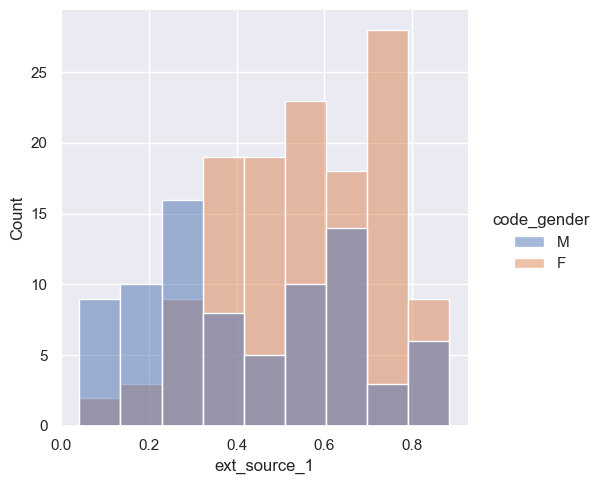

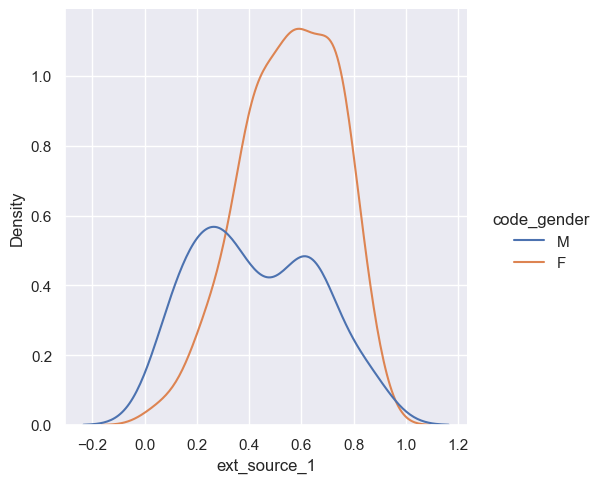

In [21]:
# numeric vs. category as overlapping lines/curves
g = sns.displot(data=K, x="ext_source_1", hue="code_gender") # overlapping histograms
g = sns.displot(data=K, x="ext_source_1", hue="code_gender", kind="kde") # overlapping KDE


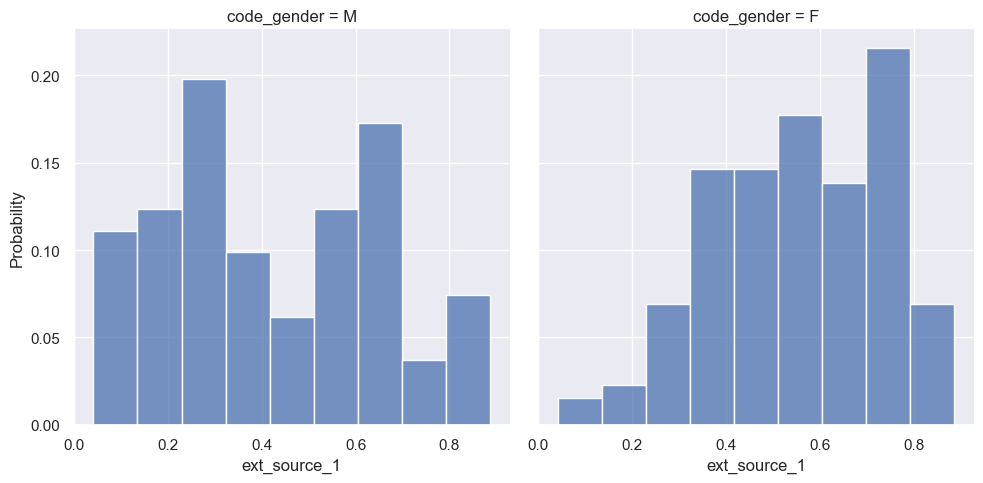

In [22]:
# numeric vs. category as separate graphs
g = sns.displot(data=K, x="ext_source_1", col="code_gender", stat="probability", common_norm=False) # separate histograms

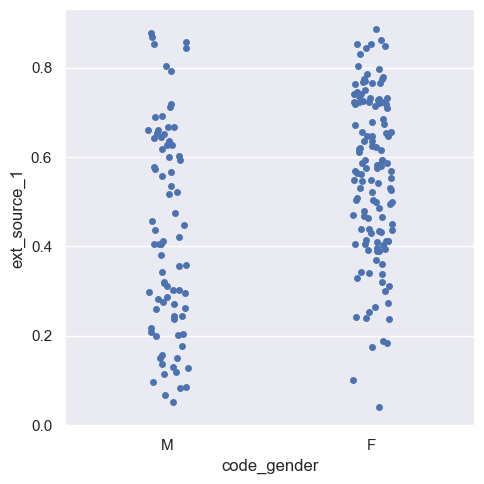

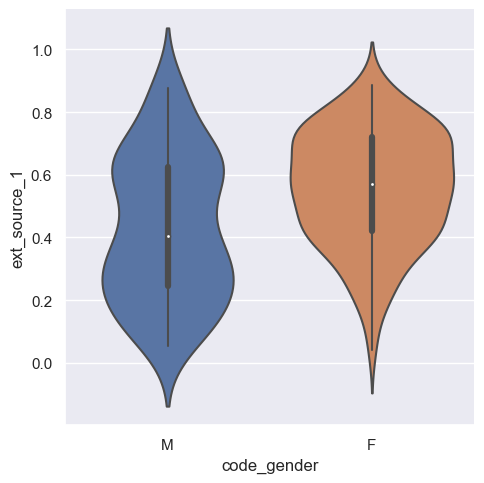

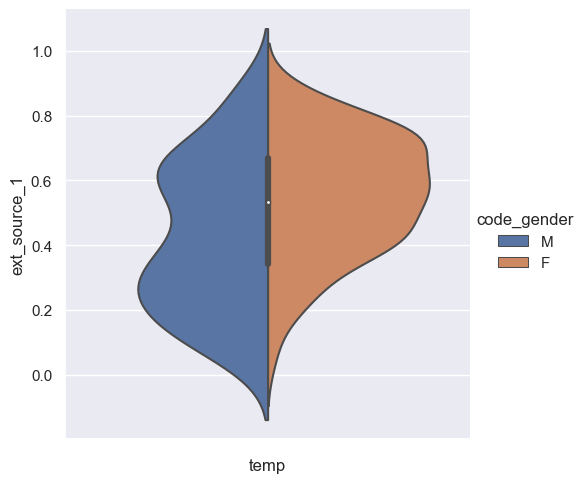

In [23]:
# numeric vs. category as sections of one graph
g = sns.catplot(data=K, x="code_gender", y="ext_source_1") # stripplot
g = sns.catplot(data=K, x="code_gender", y="ext_source_1", kind="violin") # violinplot
g = sns.catplot(data=K.assign(temp=""), x="temp", y="ext_source_1", hue="code_gender", kind="violin", split=True)

We may want to compute statistics like mean, median or SD by categories and compare them. Computing is easy by pandas *groupby* and *agg* methods. For plotting by seaborn we can use *barplot*, which is a special functionality of *catplot* method.

In [24]:
# statistics by categories
K.groupby("code_gender").agg({"ext_source_1": ["mean", "median", "std"]})

ext_source_1                    
                    mean    median       std
code_gender                                 
F               0.555957  0.571107  0.181368
M               0.427220  0.405098  0.230805

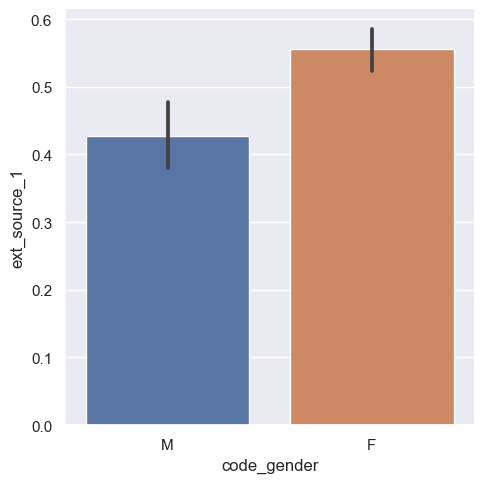

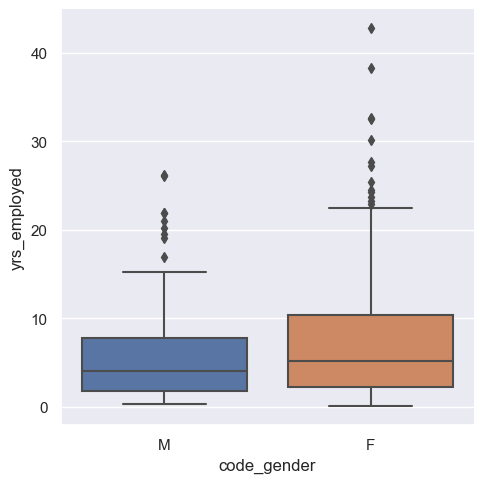

In [25]:
# barplots with estimator by categories
g = sns.catplot(data=K, x="code_gender", y="ext_source_1", kind="bar")
g = sns.catplot(data=K, x="code_gender", y="yrs_employed", kind="box")

When both variables are numeric, we use *relplot* or *displot* method with two basic cases:

* for each x value there can be more observations &ndash; *scatterplot* (a cloud of points), heatmap, contourplot
* for each x value there is only one observation or we want to aggregate over y axis &ndash; *lineplot* (time series)

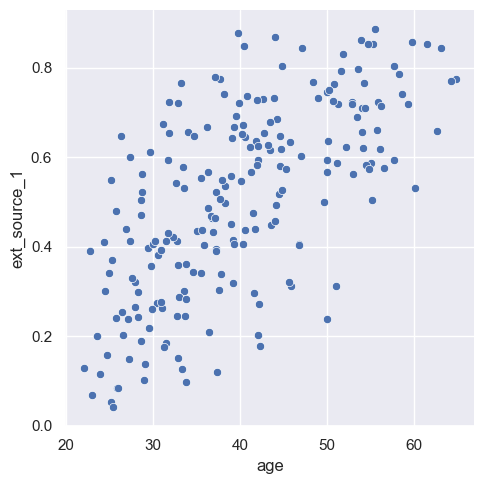

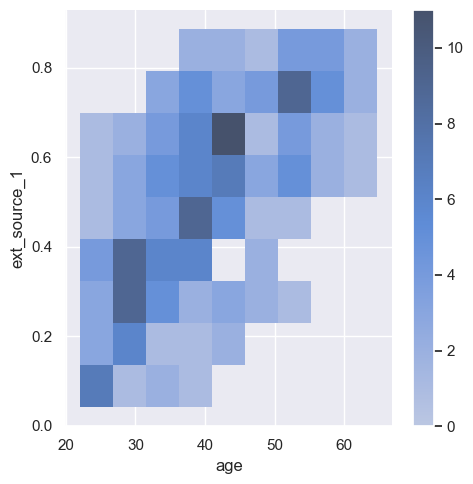

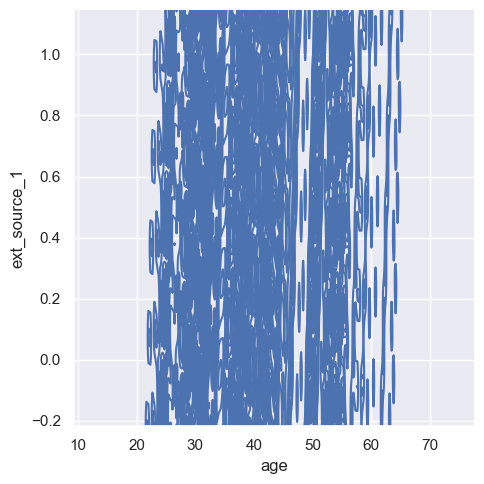

In [26]:
g = sns.relplot(data=K, x="age", y="ext_source_1") # scatterplot
g = sns.displot(data=K, x="age", y="ext_source_1", cbar=True) # heatmap
g = sns.displot(data=K, x="age", y="ext_source_1", kind="kde") # contourplot

Scatterplot or contourplot can be combined with graphs of individual distributions (histogram, density). It does method *jointplot*.

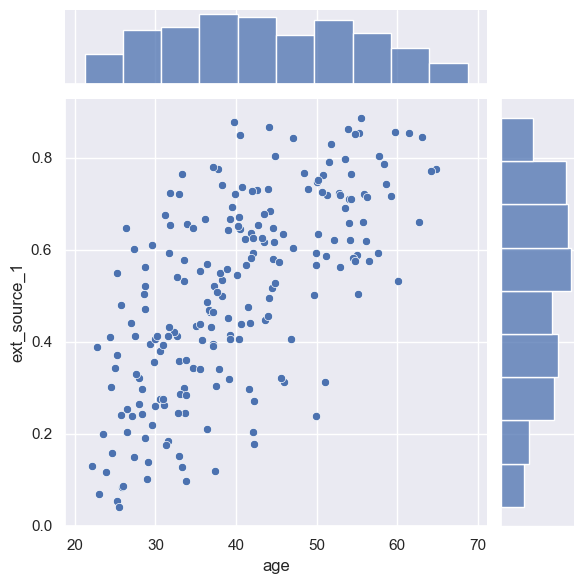

In [27]:
# jointplot - both scatterplot and individual distributions
g = sns.jointplot(data=K, x="age", y="ext_source_1")

In [28]:
# lineplot
# try yourself :-)

## 2. Tasks for you

We will use the same data as above (file *application_train.csv* from *kaggle_home_credit.zip*) but bigger volume of it.

1. Read file *application_train.csv* again and make from it a random sample of 5 000 records.
2. Transform data as above: *data_birth* -> *age*, *days_employed* -> *years_employed*.
3. Explore distribution of *age* by ECDF, density estimation, histogram, boxplot:
   + In histogram use bins of 5 years, try to make reasonable boundaries of them (e. g. 20-25 etc., see parameter *bins*).
   + In density estimation, limit the curve to the variable range (see parameter *cut* in *histplot*).
   + In both histogram and density, try various amount of smoothing.
   + For one graph (no matter which one) do a neat annotation (proper title, axis labels), try to change theme (*set_theme* method), font size (*font_scale* in *set* method), color (find yourself).
4. Is distribution of *age* more likely Gaussian-like, or skewed? Does 1-sigma and 2-sigma rule hold for it?
5. Explore distribution of *cnt_children*, consider it like a categorial ordered variable &ndash; make frequency table(s) and graphs.
6. Explore relationship of *flag_own_car*, *name_family_status*, *yrs_employed* and *ext_source_1* to answer following questions:
   - What is share of car owners in groups by family status? (Compute owner shares as decimal numbers and plot them as means in categories &ndash; mean of 0/1 variable is, in fact, share of 1's.)
   - Plot *ext_source_1* and *yrs_employed* first together and then with distinction of car ownership as a category.
   - What is distribution *ext_source_1* in groups by family status (make a plot)? What statistics do describe well this distribution? Compute them for each group.
   - Do the same for *yrs_employed* instead of *ext_source_1*. Do we use same or different statistics to describe distribution of *yrs_employed*? Again, compute them.
7. Make a plot of *age* distribution for grouping by *code_gender* and *cnt_children* (together, i. e. nested grouping).

In [29]:
data = pd.read_csv("application_train.csv")
data = data.sample(n=5000)
data.columns = data.columns.str.lower() # column names to lowercase
data

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,...,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year
213114,346965,0,Cash loans,F,N,Y,0,112500.0,490005.0,23701.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
10863,112643,0,Revolving loans,F,N,Y,1,135000.0,202500.0,10125.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
285321,430441,0,Cash loans,M,N,Y,0,69750.0,454500.0,14661.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
271043,414210,0,Cash loans,F,N,Y,0,49500.0,350860.5,17010.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
146981,270413,0,Cash loans,F,N,N,0,135000.0,497520.0,25402.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227100,363046,0,Cash loans,M,Y,N,0,401161.5,1575000.0,56776.5,...,1,0,0,0,0.0,0.0,0.0,1.0,1.0,0.0
93072,208073,0,Revolving loans,F,Y,N,0,360000.0,675000.0,33750.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
284040,428946,0,Cash loans,M,Y,Y,1,81000.0,450000.0,17095.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,6.0
112911,230967,0,Cash loans,F,N,Y,0,112500.0,640080.0,29839.5,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,4.0


In [30]:
# new columns with more intuitive values
data["age"] = -data["days_birth"] / 365.25 
data["yrs_employed"] = -data["days_employed"] / 365.25
data

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,...,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,age,yrs_employed
213114,346965,0,Cash loans,F,N,Y,0,112500.0,490005.0,23701.5,...,0,0,0.0,0.0,0.0,0.0,0.0,3.0,63.942505,-999.980835
10863,112643,0,Revolving loans,F,N,Y,1,135000.0,202500.0,10125.0,...,0,0,0.0,0.0,0.0,0.0,0.0,2.0,53.316906,25.837098
285321,430441,0,Cash loans,M,N,Y,0,69750.0,454500.0,14661.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,54.349076,6.469541
271043,414210,0,Cash loans,F,N,Y,0,49500.0,350860.5,17010.0,...,0,0,0.0,0.0,0.0,1.0,0.0,1.0,63.737166,-999.980835
146981,270413,0,Cash loans,F,N,N,0,135000.0,497520.0,25402.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,67.915127,-999.980835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227100,363046,0,Cash loans,M,Y,N,0,401161.5,1575000.0,56776.5,...,0,0,0.0,0.0,0.0,1.0,1.0,0.0,26.151951,1.902806
93072,208073,0,Revolving loans,F,Y,N,0,360000.0,675000.0,33750.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,44.454483,9.774127
284040,428946,0,Cash loans,M,Y,Y,1,81000.0,450000.0,17095.5,...,0,0,0.0,0.0,0.0,1.0,0.0,6.0,28.391513,1.396304
112911,230967,0,Cash loans,F,N,Y,0,112500.0,640080.0,29839.5,...,0,0,0.0,0.0,0.0,0.0,2.0,4.0,31.118412,8.561259


<AxesSubplot: xlabel='age', ylabel='Count'>

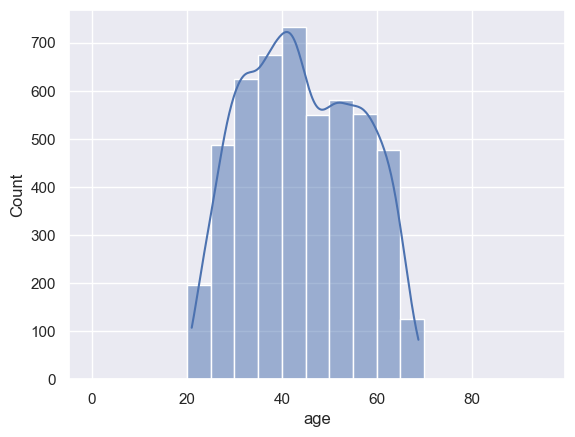

In [35]:
bin_ranges = [i * 5 for i in range(0,20)]
sns.histplot(data, x="age", bins=bin_ranges, kde=True)

<AxesSubplot: xlabel='age', ylabel='Proportion'>

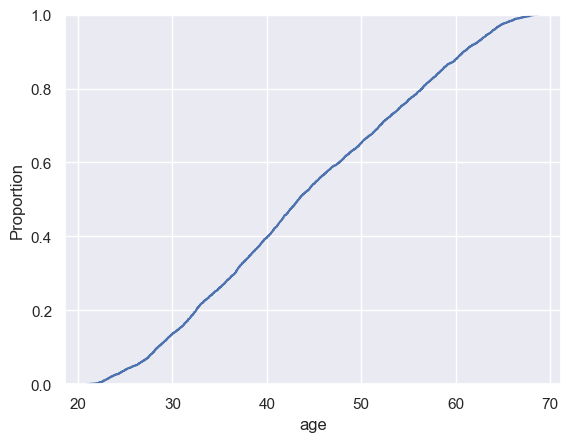

In [32]:
sns.ecdfplot(data, x="age")

<AxesSubplot: xlabel='age', ylabel='Density'>

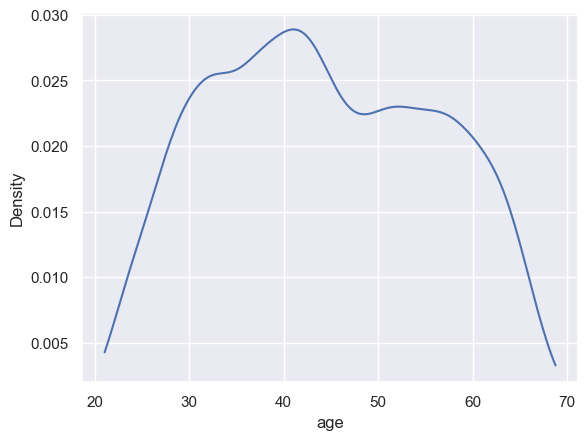

In [33]:
sns.kdeplot(data, x="age", cut=0)

Text(0.5, 1.0, 'Average age')

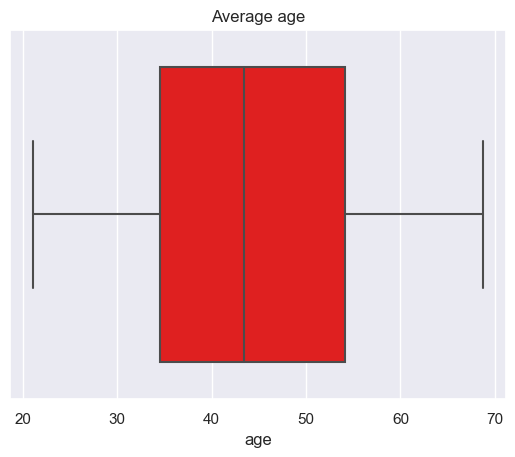

In [41]:
sns.boxplot(data, x="age",palette=["red"]).set_title("Average age")